<a href="https://colab.research.google.com/github/shukurullo2004/Machine-learnings/blob/main/01_PYTORCH_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
from torch import nn

In [5]:
X = torch.arange(0, 1, 0.02).unsqueeze(dim = 1)
weigt = 0.7
bias = 0.3
y = weigt * X + bias

X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [6]:
len(X), len(y)

(50, 50)

In [7]:
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = X[:train_split]
X_test = X[train_split:]
y_test = X[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [8]:
import matplotlib.pyplot as plt
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data, y_train, c = "b",  s = 4, label = "Training data")
  plt.scatter(test_data, y_test, c = "g",  s = 4, label = "Test data")
  if predictions is not None:
      # Plot the predictions in red (predictions were made on the test data)
      plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
  plt.legend(prop={"size": 14});

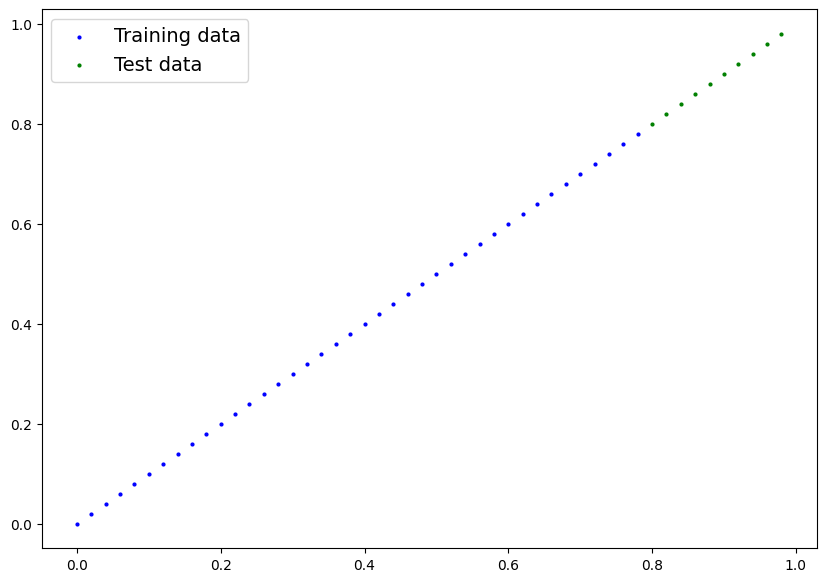

In [9]:
plot_predictions()

In [10]:
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1,
                                              requires_grad= True,
                                              dtype = torch.float))
      self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

  def forward(self, x: torch.tensor) -> torch.Tensor:
      return self.weights * x + self.bias



In [11]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]))

In [13]:
with torch.inference_mode():
  y_pred = model_0(X_test)


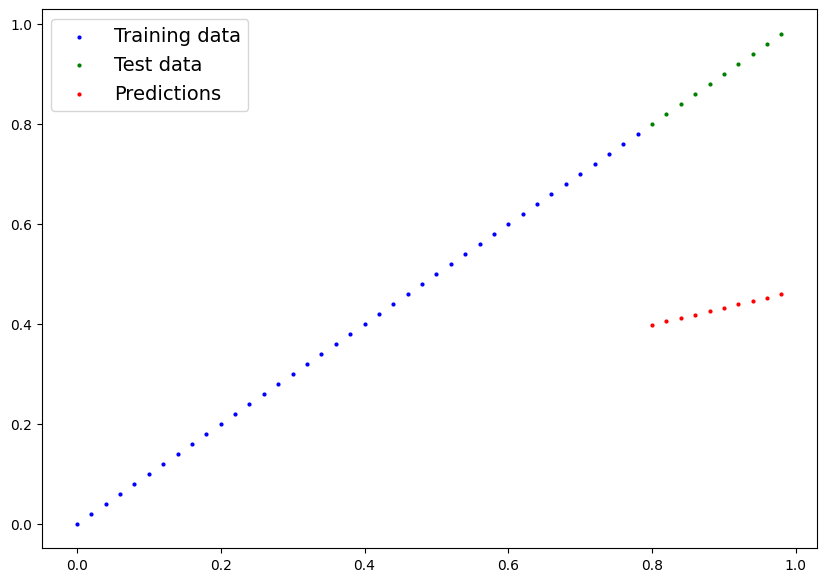

In [14]:
plot_predictions(predictions = y_pred)

In [15]:
loss_fn = nn.L1Loss()

In [16]:
optimizer = torch.optim.SGD(params=model_0.parameters(),lr = 0.01)

In [17]:
epochs = 200
#print loss

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.16443711519241333 | MAE Test Loss: 0.45346564054489136 
Epoch: 10 | MAE Train Loss: 0.1380200982093811 | MAE Test Loss: 0.38710135221481323 
Epoch: 20 | MAE Train Loss: 0.1240791454911232 | MAE Test Loss: 0.3392970860004425 
Epoch: 30 | MAE Train Loss: 0.11643104255199432 | MAE Test Loss: 0.3055989146232605 
Epoch: 40 | MAE Train Loss: 0.11116994917392731 | MAE Test Loss: 0.28111687302589417 
Epoch: 50 | MAE Train Loss: 0.10716994106769562 | MAE Test Loss: 0.2633168399333954 
Epoch: 60 | MAE Train Loss: 0.10350941121578217 | MAE Test Loss: 0.2502627968788147 
Epoch: 70 | MAE Train Loss: 0.1000194102525711 | MAE Test Loss: 0.23924274742603302 
Epoch: 80 | MAE Train Loss: 0.09652940928936005 | MAE Test Loss: 0.22822265326976776 
Epoch: 90 | MAE Train Loss: 0.09303940832614899 | MAE Test Loss: 0.2172025889158249 
Epoch: 100 | MAE Train Loss: 0.08959401398897171 | MAE Test Loss: 0.208930104970932 
Epoch: 110 | MAE Train Loss: 0.08616179972887039 | MAE Test Loss

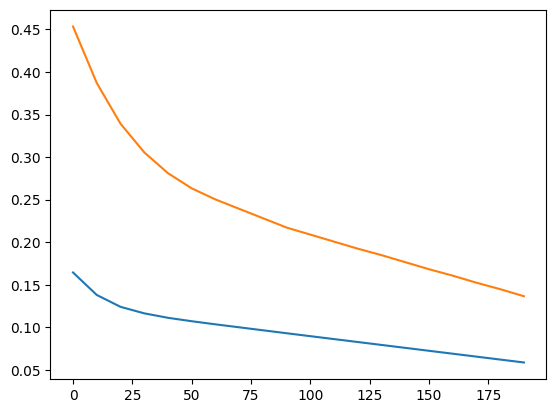

In [18]:
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values)),label = "Train loss")
plt.plot(epoch_count,test_loss_values,label = "Test loss")

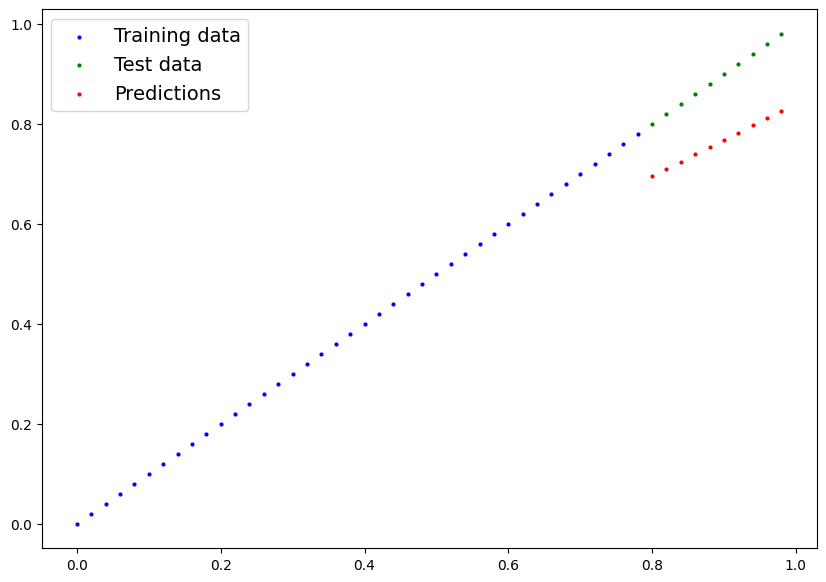

In [19]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)
plot_predictions(predictions=y_pred_new)


In [22]:
#saving model
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents =True, exist_ok = True)

MODEL_NAME = "Shukurullos 1 saved model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(obj = model_0.state_dict,f =MODEL_SAVE_PATH)

In [21]:
()

()